In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Generate a linearly separable dataset
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Generate a non-linearly separable dataset
X_nonlinear, y_nonlinear = make_moons(n_samples=100, noise=0.2, random_state=42)

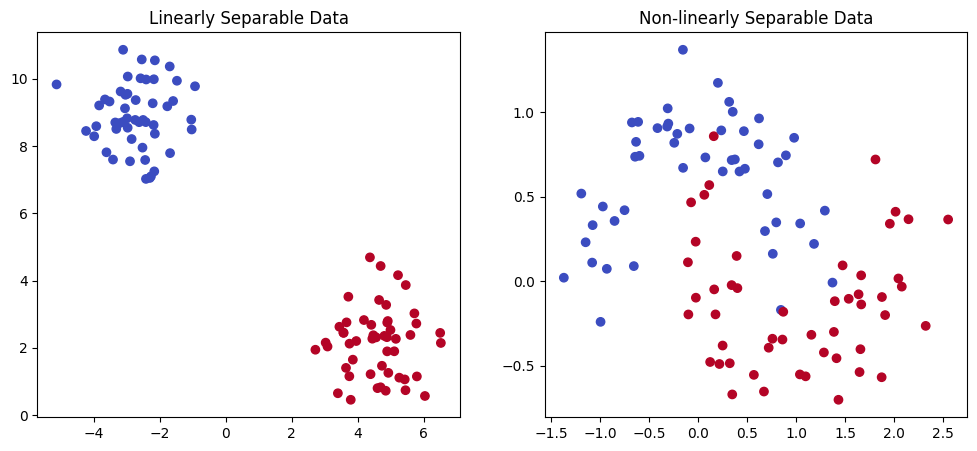

In [3]:
# Plot linearly separable data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='coolwarm')
plt.title("Linearly Separable Data")

# Plot non-linearly separable data
plt.subplot(1, 2, 2)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='coolwarm')
plt.title("Non-linearly Separable Data")
plt.show()

In [4]:
# Split linearly separable dataset
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42)

# Split non-linearly separable dataset
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.3, random_state=42)

In [5]:
# SVM for linearly separable data
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_linear, y_train_linear)

# SVM for non-linearly separable data
svm_nonlinear = SVC(kernel='rbf', gamma='scale')
svm_nonlinear.fit(X_train_nonlinear, y_train_nonlinear)

SVC()

In [6]:
# Predict for linear model
y_pred_linear = svm_linear.predict(X_test_linear)
accuracy_linear = accuracy_score(y_test_linear, y_pred_linear)
report_linear = classification_report(y_test_linear, y_pred_linear)
confusion_linear = confusion_matrix(y_test_linear, y_pred_linear)

# Predict for nonlinear model
y_pred_nonlinear = svm_nonlinear.predict(X_test_nonlinear)
accuracy_nonlinear = accuracy_score(y_test_nonlinear, y_pred_nonlinear)
report_nonlinear = classification_report(y_test_nonlinear, y_pred_nonlinear)
confusion_nonlinear = confusion_matrix(y_test_nonlinear, y_pred_nonlinear)

In [7]:
print("Linearly Separable Dataset - Linear SVM")
print(f"Accuracy: {accuracy_linear:.2f}")
print("Classification Report:\n", report_linear)
print("Confusion Matrix:\n", confusion_linear)

print("\nNon-linearly Separable Dataset - RBF SVM")
print(f"Accuracy: {accuracy_nonlinear:.2f}")
print("Classification Report:\n", report_nonlinear)
print("Confusion Matrix:\n", confusion_nonlinear)

Linearly Separable Dataset - Linear SVM
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[14  0]
 [ 0 16]]

Non-linearly Separable Dataset - RBF SVM
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[19  1]
 [ 0 10]]


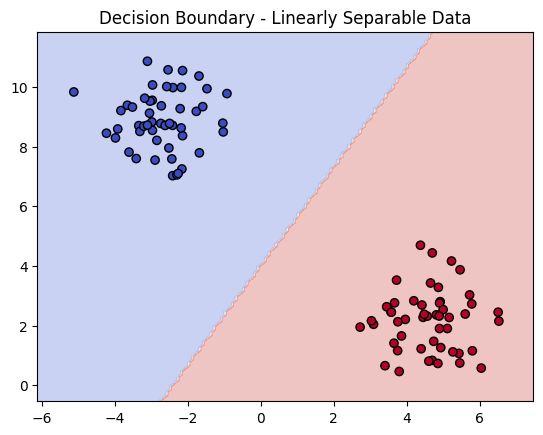

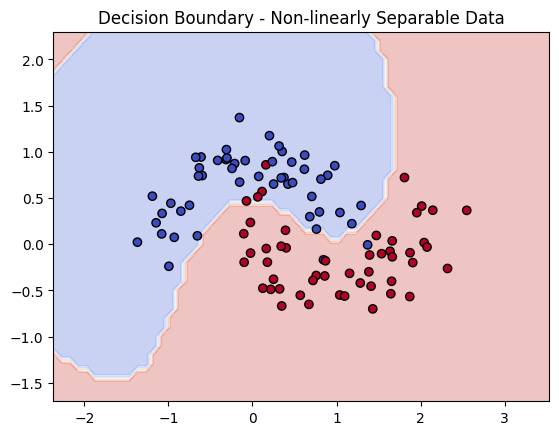

In [8]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict classifications over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.show()

# Plot decision boundary for linearly separable data
plot_decision_boundary(svm_linear, X_linear, y_linear, "Decision Boundary - Linearly Separable Data")

# Plot decision boundary for non-linearly separable data
plot_decision_boundary(svm_nonlinear, X_nonlinear, y_nonlinear, "Decision Boundary - Non-linearly Separable Data")